In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


energyData = pd.read_csv("/Users/tanneramman/Downloads/energyDataLinear2021.csv")
energyData.head()

/Users/tanneramman/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Unnamed: 0,County,Estimate!!Total,Estimate!!Total!!Utility gas,"Estimate!!Total!!Bottled, tank, or LP gas",Estimate!!Total!!Electricity,"Estimate!!Total!!Fuel oil, kerosene, etc.",Estimate!!Total!!Coal or coke,Estimate!!Total!!Wood,Estimate!!Total!!Solar energy,...,Longitude,tempmax,tempmin,temp,humidity,precipcover,cloudcover,solarradiation,solarenergy,uvindex
0,0,Phillips,1696.0,934.0,298.0,409.0,2.0,0.0,9.0,0.0,...,-102.345105,68.353846,39.351282,52.939744,56.822436,2.590833,16.762821,222.436538,14.953846,5.942308
1,1,Phillips,1668.0,982.0,313.0,331.0,2.0,0.0,9.0,0.0,...,-102.345105,68.353846,39.351282,52.939744,56.822436,2.590833,16.762821,222.436538,14.953846,5.942308
2,2,Phillips,1689.0,1041.0,264.0,347.0,2.0,0.0,0.0,0.0,...,-102.345105,68.353846,39.351282,52.939744,56.822436,2.590833,16.762821,222.436538,14.953846,5.942308
3,3,Phillips,1737.0,1159.0,264.0,277.0,3.0,0.0,1.0,0.0,...,-102.345105,68.353846,39.351282,52.939744,56.822436,2.590833,16.762821,222.436538,14.953846,5.942308
4,4,Phillips,1733.5,1212.5,247.0,246.0,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
energyData.columns

Index(['Unnamed: 0', 'County', 'Estimate!!Total',
       'Estimate!!Total!!Utility gas',
       'Estimate!!Total!!Bottled, tank, or LP gas',
       'Estimate!!Total!!Electricity',
       'Estimate!!Total!!Fuel oil, kerosene, etc.',
       'Estimate!!Total!!Coal or coke', 'Estimate!!Total!!Wood',
       'Estimate!!Total!!Solar energy', 'Estimate!!Total!!Other fuel',
       'Estimate!!Total!!No fuel used', 'State', 'County Number', 'Year',
       'Census_Population', 'FIPS', 'County Seat(s)', 'Population (2010)',
       'Land Area km2', 'Land Area mi2', 'Water Area km2', 'Water Area mi2',
       'Total Area km2', 'Total Area mi2', 'Latitude', 'Longitude', 'tempmax',
       'tempmin', 'temp', 'humidity', 'precipcover', 'cloudcover',
       'solarradiation', 'solarenergy', 'uvindex'],
      dtype='object')

In [3]:
energy = energyData.copy()
energy = energy.drop(columns = 'Unnamed: 0')
energy.head()

,County,Estimate!!Total,Estimate!!Total!!Utility gas,"Estimate!!Total!!Bottled, tank, or LP gas",Estimate!!Total!!Electricity,"Estimate!!Total!!Fuel oil, kerosene, etc.",Estimate!!Total!!Coal or coke,Estimate!!Total!!Wood,Estimate!!Total!!Solar energy,Estimate!!Total!!Other fuel,...,Longitude,tempmax,tempmin,temp,humidity,precipcover,cloudcover,solarradiation,solarenergy,uvindex
0,Phillips,1696.0,934.0,298.0,409.0,2.0,0.0,9.0,0.0,41.0,...,-102.345105,68.353846,39.351282,52.939744,56.822436,2.590833,16.762821,222.436538,14.953846,5.942308
1,Phillips,1668.0,982.0,313.0,331.0,2.0,0.0,9.0,0.0,23.0,...,-102.345105,68.353846,39.351282,52.939744,56.822436,2.590833,16.762821,222.436538,14.953846,5.942308
2,Phillips,1689.0,1041.0,264.0,347.0,2.0,0.0,0.0,0.0,25.0,...,-102.345105,68.353846,39.351282,52.939744,56.822436,2.590833,16.762821,222.436538,14.953846,5.942308
3,Phillips,1737.0,1159.0,264.0,277.0,3.0,0.0,1.0,0.0,26.0,...,-102.345105,68.353846,39.351282,52.939744,56.822436,2.590833,16.762821,222.436538,14.953846,5.942308
4,Phillips,1733.5,1212.5,247.0,246.0,3.0,0.0,0.0,0.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
energy.columns

Index(['County', 'Estimate!!Total', 'Estimate!!Total!!Utility gas',
       'Estimate!!Total!!Bottled, tank, or LP gas',
       'Estimate!!Total!!Electricity',
       'Estimate!!Total!!Fuel oil, kerosene, etc.',
       'Estimate!!Total!!Coal or coke', 'Estimate!!Total!!Wood',
       'Estimate!!Total!!Solar energy', 'Estimate!!Total!!Other fuel',
       'Estimate!!Total!!No fuel used', 'State', 'County Number', 'Year',
       'Census_Population', 'FIPS', 'County Seat(s)', 'Population (2010)',
       'Land Area km2', 'Land Area mi2', 'Water Area km2', 'Water Area mi2',
       'Total Area km2', 'Total Area mi2', 'Latitude', 'Longitude', 'tempmax',
       'tempmin', 'temp', 'humidity', 'precipcover', 'cloudcover',
       'solarradiation', 'solarenergy', 'uvindex'],
      dtype='object')

/var/folders/ll/h3wvpy857rl6ymwlx5vs4p0m0000gn/T/ipykernel_21707/1096477752.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  copy['summed'] = copy.sum(axis=1)


<IPython.core.display.Javascript object>


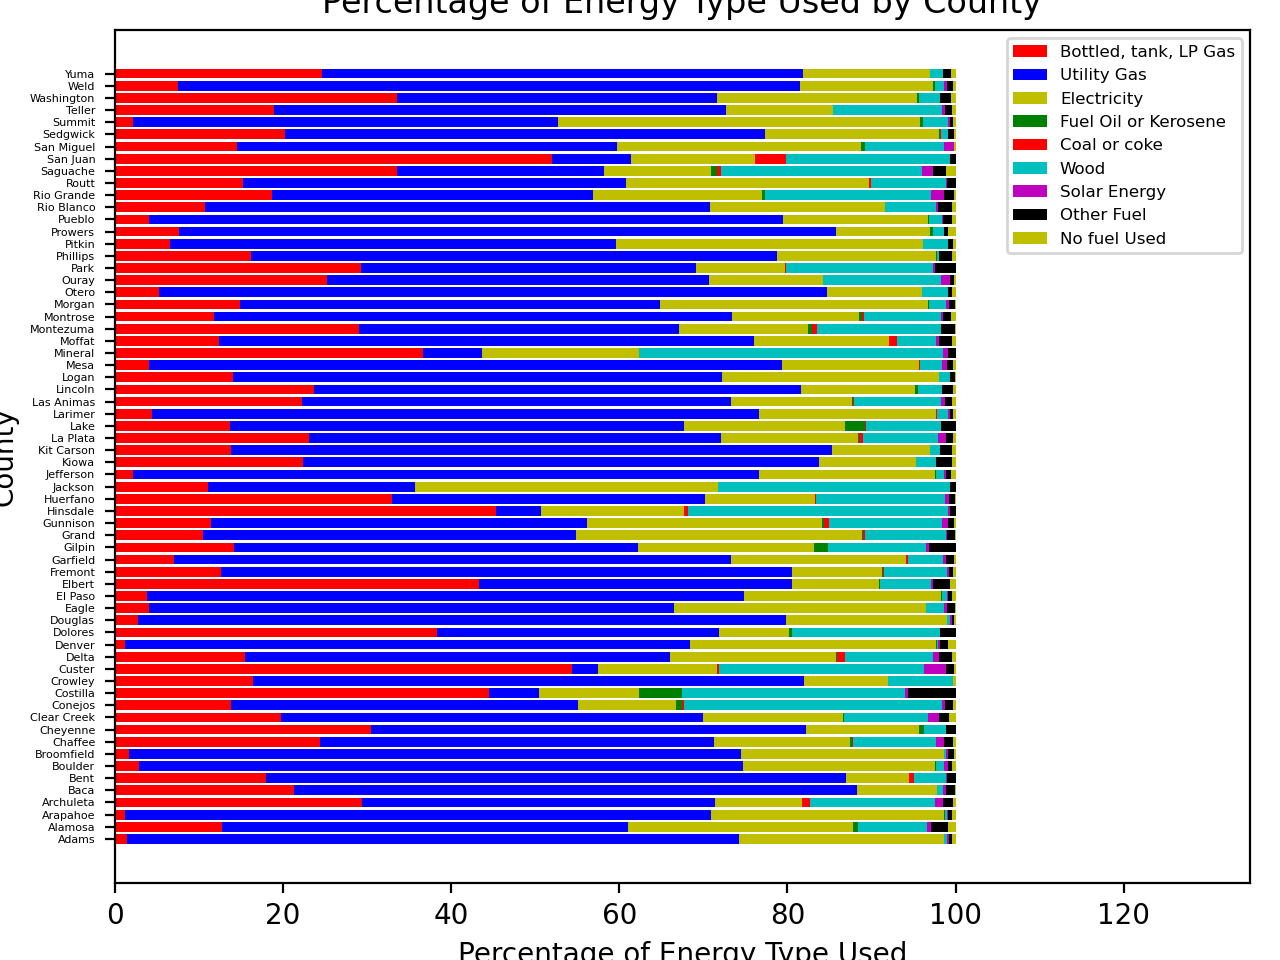

In [8]:
%matplotlib notebook

countyGroup = energy.groupby(['County'], as_index = False).mean()

justEnergy = countyGroup[['County', 'Estimate!!Total!!Utility gas', 
                           'Estimate!!Total!!Bottled, tank, or LP gas', 'Estimate!!Total!!Electricity',
                           'Estimate!!Total!!Fuel oil, kerosene, etc.', 'Estimate!!Total!!Coal or coke',
                           'Estimate!!Total!!Wood', 'Estimate!!Total!!Solar energy', 
                           'Estimate!!Total!!Other fuel', 'Estimate!!Total!!No fuel used']]
copy = justEnergy.copy()
copy['summed'] = copy.sum(axis=1)


x = copy['County']
y0 = copy['Estimate!!Total!!Bottled, tank, or LP gas']/copy['summed']*100
y1 = copy['Estimate!!Total!!Utility gas']/copy['summed']*100
y2 = copy['Estimate!!Total!!Electricity']/copy['summed']*100
y3 = copy['Estimate!!Total!!Fuel oil, kerosene, etc.']/copy['summed']*100
y4 = copy['Estimate!!Total!!Coal or coke']/copy['summed']*100
y5 = copy['Estimate!!Total!!Wood']/copy['summed']*100
y6 = copy['Estimate!!Total!!Solar energy']/copy['summed']*100
y7 = copy['Estimate!!Total!!Other fuel']/copy['summed']*100
y8 = copy['Estimate!!Total!!No fuel used']/copy['summed']*100
#y9 = copy[]/copy['summed']*100                       

plt.barh(x, y0, color='r')
plt.barh(x, y1, left=y0, color='b')
plt.barh(x, y2, left=y0+y1, color='y')
plt.barh(x, y3, left=y0+y1+y2, color='g')
plt.barh(x, y4, left=y0+y1+y2+y3, color='r')
plt.barh(x, y5, left=y0+y1+y2+y3+y4, color='c')
plt.barh(x, y6, left=y0+y1+y2+y3+y4+y5, color='m')
plt.barh(x, y7, left=y0+y1+y2+y3+y4+y5+y6, color='k')
plt.barh(x, y8, left=y0+y1+y2+y3+y4+y5+y6+y7, color='y')
#plt.bar(x, y9, bottom=y0+y1+y2+y3+y4+y5+y6+y7+y8, color='b')
plt.yticks(fontsize = 4)
plt.savefig("/Users/tanneramman/Downloads/EnergyBarStacked.png")
plt.xlim(0,135)
#plt.figure(figsize=(5,25))

plt.legend(['Bottled, tank, LP Gas', 'Utility Gas', 'Electricity', 'Fuel Oil or Kerosene', 'Coal or coke', 'Wood', 'Solar Energy', 'Other Fuel', 'No fuel Used'], fontsize = '6', loc = 'upper right')

plt.tight_layout()
plt.xlabel("Percentage of Energy Type Used")
plt.ylabel("County")
plt.title("Percentage of Energy Type Used by County")
plt.show()


In [6]:
countyGroup = energy.groupby(['County']).mean()
countyGroup.head()

,Estimate!!Total,Estimate!!Total!!Utility gas,"Estimate!!Total!!Bottled, tank, or LP gas",Estimate!!Total!!Electricity,"Estimate!!Total!!Fuel oil, kerosene, etc.",Estimate!!Total!!Coal or coke,Estimate!!Total!!Wood,Estimate!!Total!!Solar energy,Estimate!!Total!!Other fuel,Estimate!!Total!!No fuel used,...,Longitude,tempmax,tempmin,temp,humidity,precipcover,cloudcover,solarradiation,solarenergy,uvindex
County,,,,,,,,,,,,,,,,,,,,,
Adams,165972.4,120736.8,2502.9,40389.5,118.1,17.5,413.2,439.5,682.6,672.3,...,-104.331872,65.986538,39.743590,52.216667,46.734615,5.128077,51.708333,267.446795,15.969231,7.044872
Alamosa,6180.1,2983.0,788.7,1650.8,39.8,2.2,506.3,27.2,124.4,58.2,...,-105.788041,61.483333,27.653205,44.257051,51.496154,4.166538,19.875000,306.921795,18.847436,7.461538
Arapahoe,239884.9,166959.4,3028.0,66495.2,229.4,75.3,555.7,496.0,984.7,1061.2,...,-104.331733,65.786538,39.827564,52.123718,46.576282,5.128077,51.721795,250.159615,14.717308,6.250000
Archuleta,5741.1,2409.3,1686.5,597.0,0.0,55.2,849.8,58.6,69.4,15.3,...,-107.050863,59.490385,32.628846,45.607692,54.287821,6.196667,27.409615,218.167308,17.635256,7.038462
Baca,1678.5,1123.7,358.3,159.3,0.0,0.0,13.2,4.9,18.7,0.8,...,-102.535457,70.808974,40.612179,55.192308,50.415385,2.964679,18.840385,295.008333,17.812179,7.262821
